In [160]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

import matplotlib.pyplot as plt

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 14 #12
plt.rcParams['ytick.major.size']  = 14#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec

In [161]:
plotA=np.genfromtxt('../Lightcurves/Photometry/plotA.csv',comments='#', delimiter=',' )
plotB=np.genfromtxt('../Lightcurves/Photometry/plotB.csv',comments='#', delimiter=',' )
plotC=np.genfromtxt('../Lightcurves/Photometry/plotC.csv',comments='#', delimiter=',' )
plotD=np.genfromtxt('../Lightcurves/Photometry/plotD.csv',comments='#', delimiter=',' )
plotE=np.genfromtxt('../Lightcurves/Photometry/plotE.csv',comments='#', delimiter=',' )
plotF=np.genfromtxt('../Lightcurves/Photometry/plotF.csv',comments='#', delimiter=',' )
plotG=np.genfromtxt('../Lightcurves/Photometry/plotG.csv',comments='#', delimiter=',' )
plotH=np.genfromtxt('../Lightcurves/Photometry/plotH.csv',comments='#', delimiter=',' )
plotI=np.genfromtxt('../Lightcurves/Photometry/plotI.csv',comments='#', delimiter=',' )

belton=pd.read_csv("../Lightcurves/Photometry/1I_2017U1_lightcurve.csv")

### Fixed Single Axis Rotation

In [162]:
def fixed_axis_lightcurve(theta,a,b,c):
    dist=np.abs(np.sin(theta)*np.tan(theta)*a**2+b**2*np.cos(theta))
    beta=np.sqrt(b**2+a**2*np.tan(theta)**2)

    return(np.pi*c*dist/beta)

def lnL(x,y,sigy):
    vary=sigy**2
    L=-0.5*(np.sum((x-y)**2/vary)+2*np.pi*np.sum(vary))
    return(L)

def minwrapper(x,mag,sigmag,theta,a,b,c):
    deltaV=x[0]
    thetainit=x[1]

    sim=deltaV-2.5*np.log10(fixed_axis_lightcurve(theta-thetainit,a,b,c))

    return(-1*lnL(sim,mag,sigmag))

def gridwrapper(p,mag,sig,time,a,b,c):   
    theta=2*np.pi*((time%p)/p)
    
    opt=minimize(minwrapper,[10,np.pi/2],args=(mag,sig,theta,a,b,c),bounds=[(10,40),(-np.pi/2,np.pi/2)])
    return(opt.fun)

In [163]:
a,b,c=19,115,115

belton=pd.read_csv("../Lightcurves/Photometry/1I_2017U1_lightcurve.csv")

beltime=belton['corrMMJD'].to_numpy()
belmag=belton['corrm'].to_numpy()
belsig=belton['sigma'].to_numpy()

belton=np.array([beltime,belmag,belsig]).T

periodlist=np.linspace(7,9,500)
test=[]
for p in periodlist:
    period=p/24
    
    test.append(gridwrapper(period,belmag[beltime<55.5],belsig[beltime<55.5],beltime[beltime<55.5]-np.min(beltime),a,b,c))

optp=periodlist[test==np.min(test)][0]
print(optp)

period=optp/24
times=beltime[beltime<55.5]-np.min(beltime)
theta=2*np.pi*((times%period)/period)

opt=minimize(minwrapper,[10,0],args=(belmag[beltime<55.5],belsig[beltime<55.5],theta,a,b,c),bounds=[(10,40),(-np.pi/2,np.pi/2)])

times=np.linspace(0,np.max(beltime)+0.2-np.min(beltime),10000)
theta=2*np.pi*(((times)%period)/period)
times+=np.min(beltime)-0.1
print(opt)

curve=opt.x[0]-2.5*np.log10(fixed_axis_lightcurve(theta-opt.x[1],a,b,c))

7.38877755511022
      fun: 63986.91101948567
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([     0.       , -69901.0143463])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([33.25155296,  1.57079633])


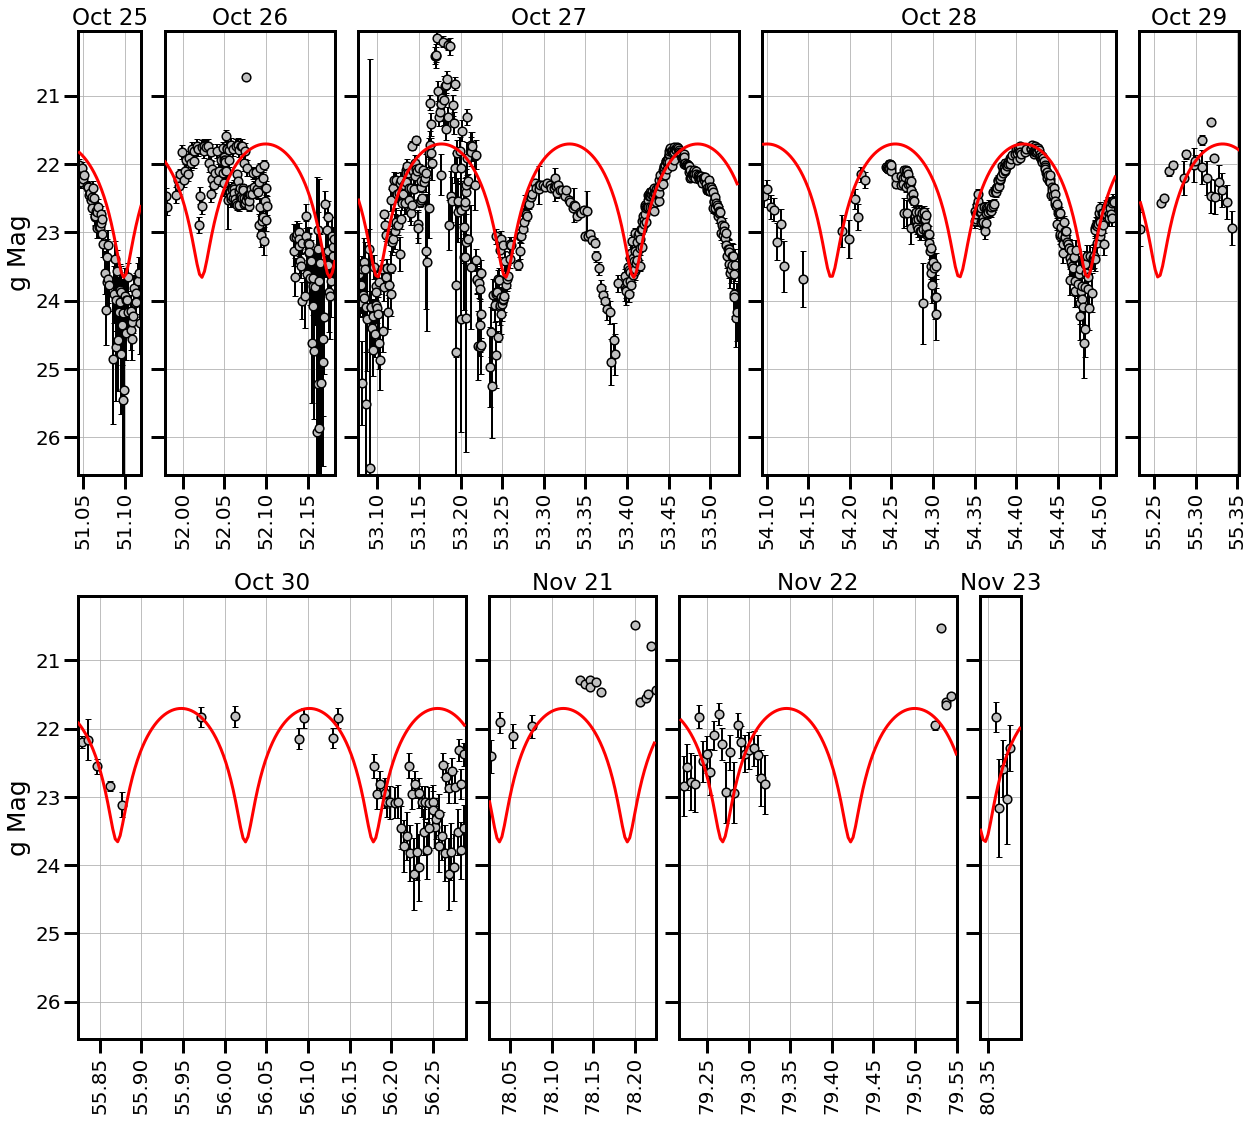

In [164]:
import matplotlib.ticker as ticker

figx,figy=16,14
fig = plt.figure(figsize=(figx,figy))
ymin,ymax=np.min(belton[:,1])-0.1,np.max(belton[:,1])+0.1

axspace=0.02
tickspace=0.05

yspace=0.06

totalwidth=5*axspace+plotA[-1,0]-plotA[0,0]+plotB[-1,0]-plotB[0,0]+plotC[-1,0]-plotC[0,0]+\
            plotD[-1,0]-plotD[0,0]+plotE[-1,0]-plotE[0,0]#+plotF[-1,0]-plotF[0,0]
platescale=1/totalwidth

corner=0

axes=[]

xmin,xmax=plotA[0,0], plotA[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0.5+yspace,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 25',fontsize=23)
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
ax.set_ylabel("g Mag",fontsize=25)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotB[0,0], plotB[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0.5+yspace,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 26',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotC[0,0], plotC[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0.5+yspace,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 27',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotD[0,0], plotD[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0.5+yspace,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 28',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotE[0,0], plotE[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0.5+yspace,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 29',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace


corner=0

xmin,xmax=plotF[0,0], plotF[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 30',fontsize=23)
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
ax.set_ylabel("g Mag",fontsize=25)
corner+=dx+axspace

xmin,xmax=plotG[0,0], plotG[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Nov 21',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotH[0,0], plotH[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Nov 22',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=80.34,80.39
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Nov 23',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

for ax in axes:
    ax.grid()
    ax.set_ylim([ymax,ymin])
    
plt.savefig('fixed_axis_lightcurve.pdf',
           bbox_inches='tight',dpi=300)


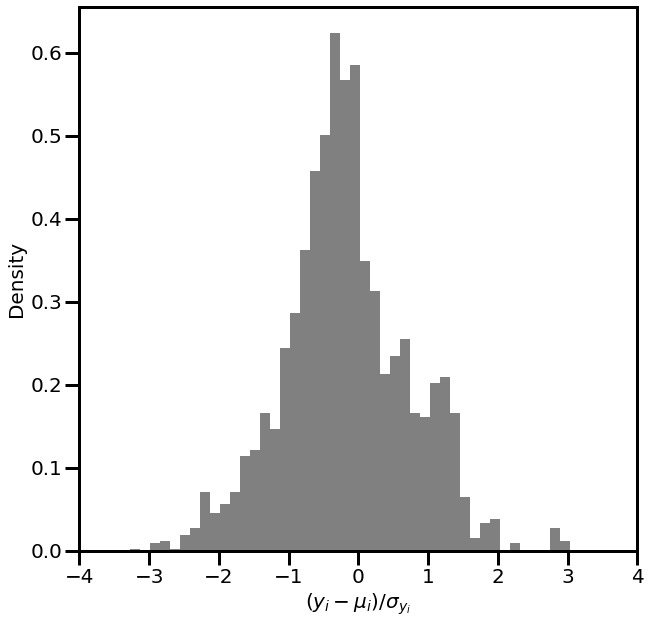

In [165]:
theta=2*np.pi*((beltime*86400/period)%period)
curve=opt.x[0]-2.5*np.log10(fixed_axis_lightcurve(theta-opt.x[1],a,b,c))

plt.figure(figsize=(10,10))
plt.hist(curve-belmag,bins=50,color='gray',density=True,weights=1/belsig)
plt.xlabel("$(y_i-\\mu_i)/\\sigma_{y_i}$")
plt.ylabel("Density")
plt.xlim([-4,4])
plt.savefig("fixed_axis_residual.pdf",
           bbox_inches='tight',dpi=300)

### Arbitrary Single Axis Rotation
Arbitrary rotation axis, numerical model.

In [171]:
import numpy as np
import scipy
import quaternion
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pandas as pd

def arbitrary_axis_lightcurve(theta,a,b,c,rot=[0,0,1],obs=[1,0,0],N=250):
    ndata=theta.size
    obs=np.quaternion(0,*obs)
    
    # Generate x,y points
    x=np.linspace(-a,a,N)
    y=np.linspace(-b,b,N)
    
    X,Y=np.meshgrid(x,y,indexing='ij')
    
    # Remove the points outside of bounds
    pts_in=np.where(X**2/a**2+Y**2/b**2<=1)
    X=X[pts_in]
    Y=Y[pts_in]
    
    # Generate z points for the x and y points
    z=c*np.sqrt(np.abs(1-X**2/a**2-Y**2/b**2))
    
    # Get +/- z points
    x=np.append(X,X)
    y=np.append(Y,Y)
    z=np.append(z,-z)
    
    npts=z.size
    
    # Combine points
    pts=np.array([x,y,z]).T
    pts=np.tile(pts[:,:,np.newaxis],ndata)
        
    rot=rot/np.sqrt(np.sum(np.square(rot)))
    nrot=np.outer(np.array(rot),np.sin(theta/2))
    nrot=np.append(np.cos(theta[np.newaxis,:]/2),nrot,axis=0)
    
    q=quaternion.as_quat_array(nrot.T)
    q*=1/np.abs(q)
    
    obs=np.conj(q)*obs*q
    obs=quaternion.as_float_array(obs)[:,1:]
    
    obs=np.repeat(obs.T[np.newaxis,:,:],npts,axis=0)
    
    inner=np.sum(pts*obs,axis=1)
    inner=np.repeat(inner[:,np.newaxis,:],3,axis=1)
    
    proj=pts-inner*obs
    proj=np.append(np.zeros((npts,ndata))[:,np.newaxis,:],proj,axis=1)    
    
    proj=np.moveaxis(proj,1,2)
    proj=quaternion.as_quat_array(proj)
    
    q=np.repeat(q[np.newaxis,:],npts,axis=0)
    
    proj=q*proj*np.conj(q)
    proj=quaternion.as_float_array(proj)
    proj=proj[:,:,2:]
    
    output=[]
    for i in tqdm(range(ndata),desc='Hull Loop',leave=True):
        hull=scipy.spatial.ConvexHull(proj[:,i,:])
        output.append(hull.volume)
        
    return(np.array(output))

def lnL(x,y,sigy):
    vary=sigy**2
    L=-0.5*(np.sum((x-y)**2/vary)+2*np.pi*np.sum(vary))
    return(L)

def gridwrapper(p,phi,psi,mag,sigmag,time,a,b,c):   
    theta=2*np.pi*((time%p)/p)
    
    rot=[np.cos(phi),np.sin(phi)*np.cos(psi),np.sin(phi)*np.sin(psi)]
    
    sim=33.25-2.5*np.log10(arbitrary_axis_lightcurve(theta-1.571,a,b,c,rot=rot,N=50))
    
    return(lnL(sim,mag,sigmag))

In [172]:
from tqdm.notebook import tqdm

a,b,c=19,115,111

belton=pd.read_csv("../Lightcurves/Photometry/1I_2017U1_lightcurve.csv")

beltime=belton['corrMMJD'].to_numpy()
belmag=belton['corrm'].to_numpy()
belsig=belton['sigma'].to_numpy()

belton=np.array([beltime,belmag,belsig]).T

periodlist=np.linspace(7,9,20)
philist=np.linspace(0,np.pi/2,10)

PER,PHI=np.meshgrid(periodlist,philist,indexing='ij')

test=np.zeros_like(PER)
for i in tqdm(range(periodlist.size),desc='Period Loop',leave=True):
    for j in tqdm(range(philist.size),desc='Phi Loop',leave=True):
        period=PER[i,j]/24

        test[i,j]=(gridwrapper(period,PHI[i,j],np.pi/2,belmag[beltime<55.5],belsig[beltime<55.5],beltime[beltime<55.5]-np.min(beltime),a,b,c))

Period Loop:   0%|          | 0/20 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Phi Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/1001 [00:00<?, ?it/s]

In [174]:
optp=PER[test==np.max(test)][0]
optphi=PHI[test==np.max(test)][0]
print(PER[test==np.max(test)])
print(PHI[test==np.max(test)])

thetainit=1.57

period=optp/24

rot=[np.cos(optphi),0,np.sin(optphi)]

times=np.linspace(np.min(beltime),np.max(beltime),10000)
theta=2*np.pi*(((times-np.min(times))%period)/period)

curve=33.25-2.5*np.log10(arbitrary_axis_lightcurve(theta-thetainit,a,b,c,rot=rot,N=50))

[7.52631579]
[1.22173048]


Hull Loop:   0%|          | 0/10000 [00:00<?, ?it/s]

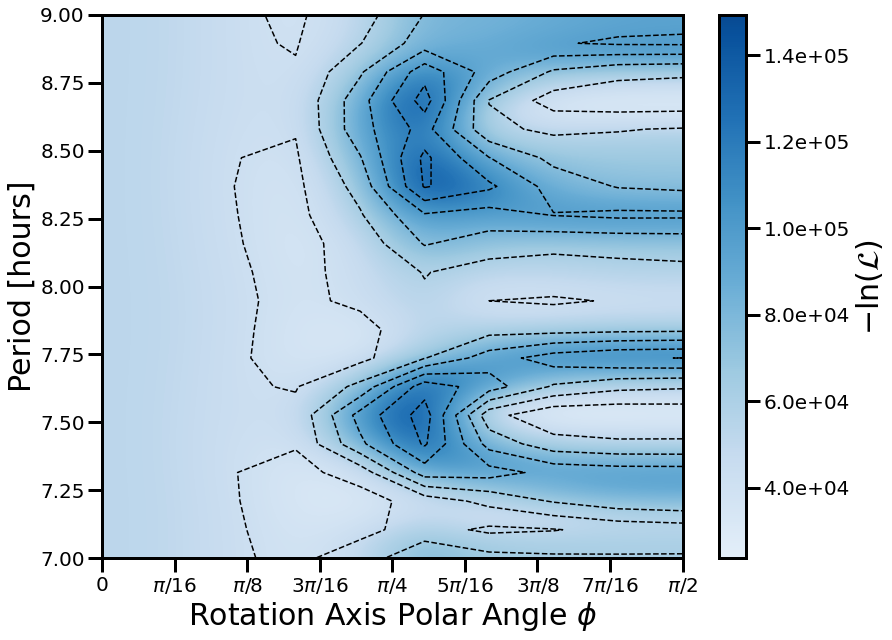

In [177]:
import matplotlib.ticker as ticker
import matplotlib.colors as colors

new_cmap = colors.LinearSegmentedColormap.from_list("test",plt.get_cmap('Blues')(np.linspace(0.1,0.9,100)))
new_cmap.set_bad('magenta')

fig, ax = plt.subplots(figsize=(13,10))
plt.imshow(-test,aspect='auto',cmap=new_cmap,interpolation='bicubic',extent=[0,np.pi/2,7,9],
          origin='lower')
plt.ylabel("Period [hours]",fontsize=30)
plt.xlabel("Rotation Axis Polar Angle $\\phi$",fontsize=30)
ax.set_xticks(np.pi/2*np.linspace(0,1,9))

ax.set_xticklabels([0,"$\\pi/16$","$\\pi/8$","$3\\pi/16$","$\\pi/4$",
                  "$5\\pi/16$","$3\\pi/8$","$7\\pi/16$","$\\pi/2$"])

def fmtcont(x,pos):
    return(r'{:.1e}'.format(x))

CS=ax.contour(PHI,PER,-test,origin='lower',colors='k',linestyles='dashed')

cb=plt.colorbar(ax=ax,format=ticker.FuncFormatter(fmtcont))
cb.set_label("$-\\ln(\\mathcal{L})$",fontsize=30)

plt.savefig("arbitrary_")

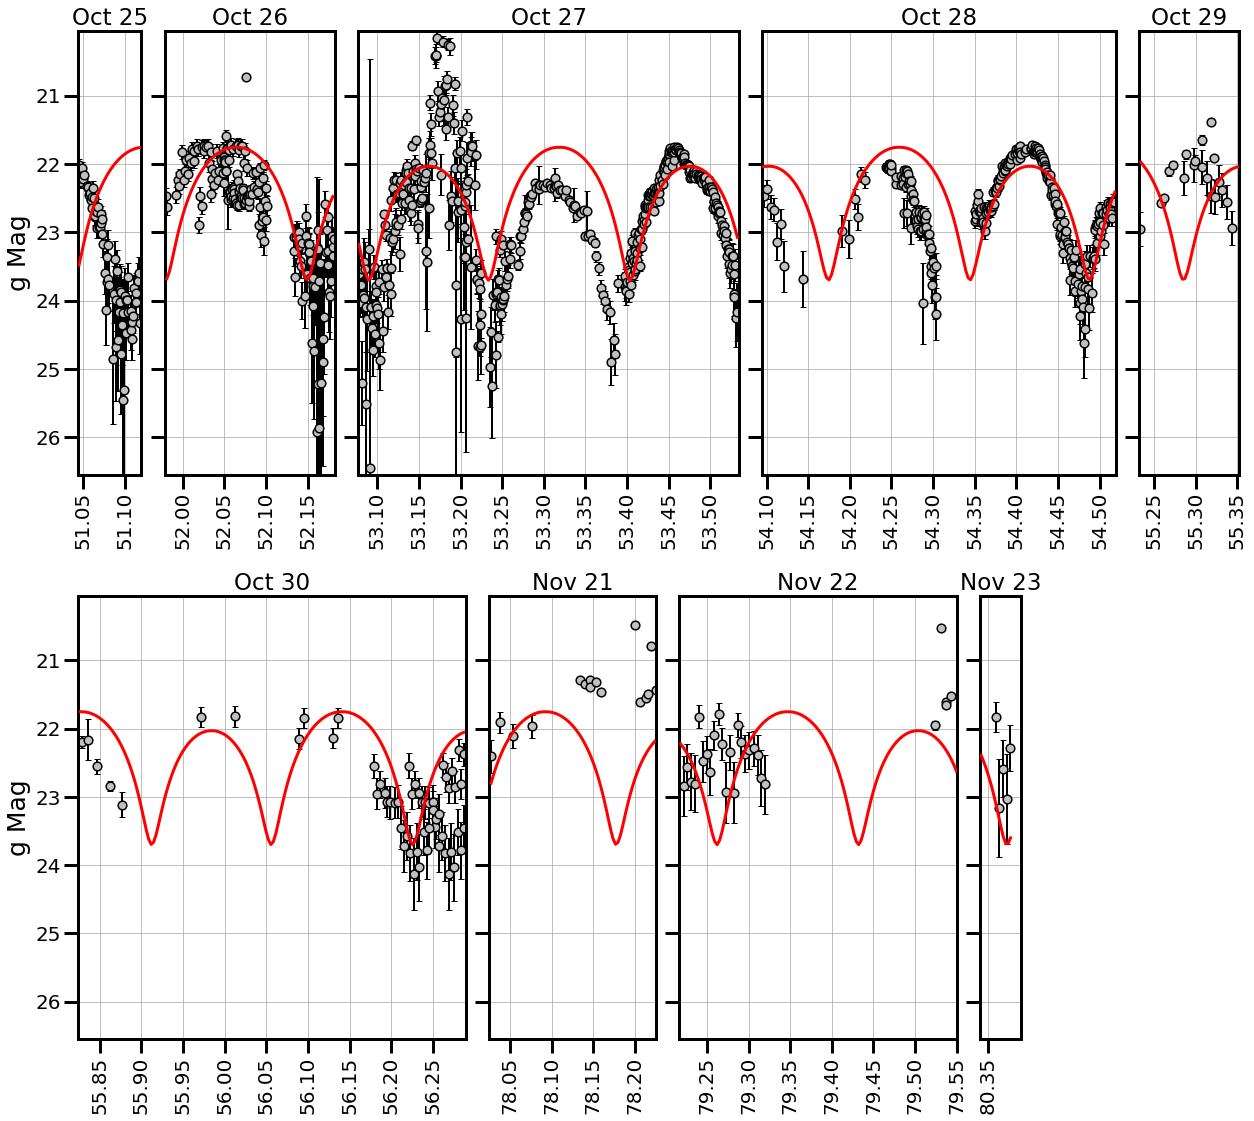

In [178]:
import matplotlib.ticker as ticker

figx,figy=16,14
fig = plt.figure(figsize=(figx,figy))
ymin,ymax=np.min(belton[:,1])-0.1,np.max(belton[:,1])+0.1

axspace=0.02
tickspace=0.05

yspace=0.06

totalwidth=5*axspace+plotA[-1,0]-plotA[0,0]+plotB[-1,0]-plotB[0,0]+plotC[-1,0]-plotC[0,0]+\
            plotD[-1,0]-plotD[0,0]+plotE[-1,0]-plotE[0,0]#+plotF[-1,0]-plotF[0,0]
platescale=1/totalwidth

corner=0

axes=[]

xmin,xmax=plotA[0,0], plotA[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0.5+yspace,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 25',fontsize=23)
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
ax.set_ylabel("g Mag",fontsize=25)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotB[0,0], plotB[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0.5+yspace,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 26',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotC[0,0], plotC[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0.5+yspace,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 27',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotD[0,0], plotD[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0.5+yspace,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 28',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotE[0,0], plotE[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0.5+yspace,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 29',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace


corner=0

xmin,xmax=plotF[0,0], plotF[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Oct 30',fontsize=23)
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
ax.set_ylabel("g Mag",fontsize=25)
corner+=dx+axspace

xmin,xmax=plotG[0,0], plotG[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Nov 21',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=plotH[0,0], plotH[-1,0]
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Nov 22',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

xmin,xmax=80.34,80.39
dx = (xmax-xmin)*platescale
ax=fig.add_axes([corner,0,dx,0.5-yspace])
axes.append(ax)
ax.set_xlim([xmin,xmax])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspace))
ax.set_title('Nov 23',fontsize=23)
ax.set_yticklabels([])
ax.errorbar(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              yerr=belton[:,2][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))], 
              fmt='none',ecolor='k',elinewidth=2,capsize=3)
ax.scatter(belton[:,0][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              belton[:,1][np.where((belton[:,0]<xmax)&(belton[:,0]>xmin))],
              s=75,edgecolors='k', linewidths=1.5,marker='o',color='silver',label='NOT',zorder=2)
ax.plot(times[np.where((times<xmax)&(times>xmin))],
             curve[np.where((times<xmax)&(times>xmin))],
             color='r',zorder=3,lw=3)
plt.xticks(rotation=90)
corner+=dx+axspace

for ax in axes:
    ax.grid()
    ax.set_ylim([ymax,ymin])
    
plt.savefig('arbitrary_axis_lightcurve.pdf',
           bbox_inches='tight',dpi=300)

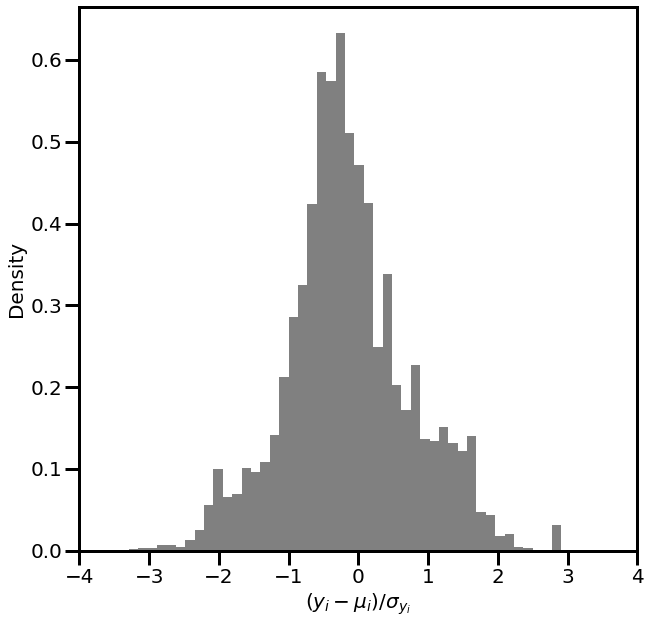

In [179]:
theta=2*np.pi*((beltime*86400/period)%period)
curve=opt.x[0]-2.5*np.log10(fixed_axis_lightcurve(theta-opt.x[1],a,b,c))

plt.figure(figsize=(10,10))
plt.hist(curve-belmag,bins=50,color='gray',density=True,weights=1/belsig)
plt.xlabel("$(y_i-\\mu_i)/\\sigma_{y_i}$")
plt.ylabel("Density")
plt.xlim([-4,4])
plt.savefig("arbitrary_axis_residual.pdf",
           bbox_inches='tight',dpi=300)

In [180]:
theta_data = np.linspace(0, 2*np.pi, 500)

simple = (fixed_axis_lightcurve(theta_data, 19, 115, 111))
light1 = (arbitrary_axis_lightcurve(theta_data, 19, 115, 111, N=50))
light2 = (arbitrary_axis_lightcurve(theta_data, 19, 115, 111, N=100))
light3 = (arbitrary_axis_lightcurve(theta_data, 19, 115, 111, N=250))

plt.figure(figsize=(8, 8))
# plt.plot(theta_data,simple)
plt.plot(theta_data, np.abs(light1-simple)/simple)
plt.plot(theta_data, np.abs(light2-simple)/simple)
plt.plot(theta_data, np.abs(light3-simple)/simple)
# plt.plot(theta_data,light3)
plt.yscale('log')
plt.legend(["$N\\approx 4,000$", "$N\\approx 15,000$", "$N\\approx 100,000$"])
plt.xticks(np.pi*np.linspace(0, 2, 9),
           labels=[0, "$\\pi/4$", "$\\pi/2$", "$3\\pi/4$", "$\\pi$",
                   "$5\\pi/4$", "$3\\pi/2$", "$7\\pi/4$", "$2\\pi$"])
plt.xlabel("$\\theta$")
plt.ylabel("$\\log_{10}(\\frac{|L_1-L_0|}{L_0})$")
plt.savefig("num_lightcurve_comp.pdf", bbox_inches='tight',
            dpi=300)

Hull Loop:   0%|          | 0/500 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Muinonen and Lumme 2015
An analytical model from M&L 2015

In [181]:
import numpy as np
import scipy
import quaternion as quat
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pandas as pd

def evolving_axis_lightcurve(theta,phi,psi,a,b,c,alpha,beta,sun=[1,0,0]): 
    import warnings
    warnings.filterwarnings("ignore")
    
    sun=quat.from_vector_part(sun)
    
    rot=np.array([np.cos(phi),np.sin(phi)*np.cos(psi),np.sin(phi)*np.sin(psi)]).T
    rot=np.einsum('ijk,ij->ijk',rot[:,None,:],beta)
    rot=quat.from_rotation_vector(rot)
    
    THETA,ALPHA=np.meshgrid(theta,alpha,indexing='ij')
    
    obs=np.array([np.cos(ALPHA),np.sin(ALPHA)*np.cos(THETA),np.sin(ALPHA)*np.sin(THETA)])
    obs=np.einsum('ijk->jki',obs)
    
    obs=quat.from_vector_part(obs)
    obs=quat.as_vector_part(rot*obs*rot.conj())
    
    sun=quat.as_vector_part(rot*sun*rot.conj())
    
    C=np.array([1/a**2,1/b**2,1/c**2])
    Ts=np.sqrt(np.einsum('ijk,ijk,k->ij',sun,sun,C))
    To=np.sqrt(np.einsum('ijk,ijk,k->ij',obs,obs,C))
    
    cosa=np.einsum('ijk,ijk,k->ij',sun,obs,C)/(Ts*To)
    cosa[np.where(cosa>1)]=1
    cosa[np.where(cosa<-1)]=-1
    
    aprime=np.arccos(cosa)
    
    aprime[np.isclose(aprime,0)]=0
    
    T=np.sqrt(np.abs(Ts**2+To**2+2*Ts*To*cosa))
    
    cosl=np.nan_to_num((Ts+To*cosa)/T,posinf=0,neginf=0)
    sinl=np.nan_to_num((To*np.sin(aprime))/T,posinf=0,neginf=0)

    lam=np.where(sinl>=0,np.arccos(cosl),-np.arccos(cosl)%(2*np.pi))
    lam[np.isclose(lam,0,atol=1e-6)]=0
    
    cotl=1/np.tan(lam/2)
    cotal=1/np.tan((aprime-lam)/2)
    
    L = np.where(np.sin(lam)!=0,sinl*np.sin(lam-aprime)*np.log(cotl*cotal),0)
    L += cosl+np.cos(lam-aprime)
    L[np.isclose(L,0)]=0
    L[L!=0] *= (np.pi*a*b*c*Ts*To/T)[L!=0]
    L[L==0] = 1e-15
    return(np.abs(L))

Hull Loop:   0%|          | 0/100 [00:00<?, ?it/s]

Hull Loop:   0%|          | 0/100 [00:00<?, ?it/s]

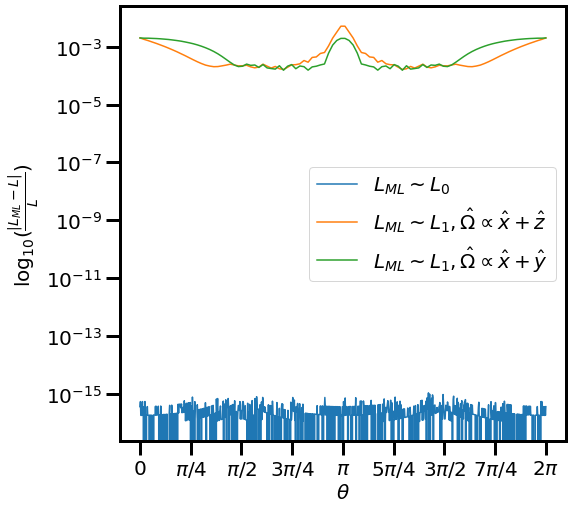

In [186]:
theta=[0]
phi=[np.pi/2]
psi=[np.pi/2]

alpha=np.arange(2)
beta=np.arange(2)+1
beta=np.linspace(0,2*np.pi,1000)[None,:]

ml=(evolving_axis_lightcurve(theta,phi,psi,19,115,111,np.zeros_like(beta),beta))[0,:]
simple=fixed_axis_lightcurve(beta[0,:],19,115,111)

plt.figure(figsize=(8,8))
plt.plot(beta[0,:],np.abs((ml-simple)/simple))

theta=[0]
phi=[np.pi/4]
psi=[np.pi/2]
beta=np.linspace(0,2*np.pi,100)[None,:]

ml=(evolving_axis_lightcurve(theta,phi,psi,19,115,111,np.zeros_like(beta),beta))[0,:]
arb=arbitrary_axis_lightcurve(beta[0,:],19,115,111,rot=[1,0,1],obs=[1,0,0],N=150)

plt.plot(beta[0,:],np.abs((ml-arb)/arb))

theta=[0]
phi=[np.pi/4]
psi=[0]
beta=np.linspace(0,2*np.pi,100)[None,:]

ml=(evolving_axis_lightcurve(theta,phi,psi,19,115,111,np.zeros_like(beta),beta))[0,:]
arb=arbitrary_axis_lightcurve(beta[0,:],19,115,111,rot=[1,1,0],obs=[1,0,0],N=150)

plt.plot(beta[0,:],np.abs((ml-arb)/arb))
plt.yscale('log')

plt.legend(["$L_{ML}\sim L_0$", "$L_{ML}\sim L_1, \\hat{\\Omega}\\propto\\hat{x}+\\hat{z}$",
            "$L_{ML}\sim L_1, \\hat{\\Omega}\\propto\\hat{x}+\\hat{y}$"])
plt.xticks(np.pi*np.linspace(0, 2, 9),
           labels=[0, "$\\pi/4$", "$\\pi/2$", "$3\\pi/4$", "$\\pi$",
                   "$5\\pi/4$", "$3\\pi/2$", "$7\\pi/4$", "$2\\pi$"])
plt.xlabel("$\\theta$")
plt.ylabel("$\\log_{10}(\\frac{|L_{ML}-L|}{L})$")
plt.savefig('ml_comp.pdf',
           bbox_inches='tight',dpi=300)